In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import pandas as pd
import random
from sklearn.datasets import make_classification

In [3]:
  X,y = make_classification(n_features =5, n_redundant =0, n_informative = 5,n_clusters_per_class =1)


In [4]:
df = pd.DataFrame(X,columns = ['Col1','Col2','Col3','Col4','Col5'])
df ['target'] = y
print(df.shape)
df.head()

(100, 6)


,Col1,Col2,Col3,Col4,Col5,target
0,-0.705494,0.383934,0.913205,-0.183762,-0.415291,0
1,-1.163616,-0.125230,0.581041,-1.436042,1.439114,1
2,-1.893364,-0.020293,0.527120,-1.481096,-2.773359,1
3,-0.019812,-0.680835,0.324093,2.035916,-0.806108,0
4,1.443701,-3.485236,1.704729,-0.926113,1.416262,1


In [5]:
df.shape[0]

100

# functions for row sampling

In [6]:
def sample_rows(df,percentage):
    return df.sample(int(percentage*df.shape[0]),replace=True)

functions for feature sampling

In [7]:
# function for feature sampling
def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  new_df = df[cols]
  new_df['target'] = df['target']
  return new_df

functions for Combined sampling

In [8]:
def combined_sampling(df , row_percent, column_percent):
    new_df = sample_rows (df, row_percent)
    return sample_features(new_df, column_percent)


In [9]:
df1 = combined_sampling(df,0.5,0.5)

/tmp/ipykernel_13/3275485051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [10]:
df2 = combined_sampling(df,.5,.5)

/tmp/ipykernel_13/3275485051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [11]:
df3 = combined_sampling(df,.5,.5)

/tmp/ipykernel_13/3275485051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [12]:
print(df1.columns)
print(df2.columns)
print(df3.columns)


Index(['Col3', 'Col4', 'target'], dtype='object')
Index(['Col3', 'Col1', 'target'], dtype='object')
Index(['Col2', 'Col4', 'target'], dtype='object')


In [13]:
#df3

In [14]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3=  DecisionTreeClassifier()



In [15]:
#clf1.fit(df1.iloc[:, 0:2], df1.iloc[:, -1].values.ravel())
# or
clf1.fit(df1.iloc[:, 0:2], df1.iloc[:, -1].squeeze())


DecisionTreeClassifier()

In [16]:
clf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:2],df3.iloc[:,-1])

DecisionTreeClassifier()

In [17]:
from sklearn.tree import plot_tree

[Text(0.5, 0.9, 'x[1] <= -0.213\ngini = 0.471\nsamples = 50\nvalue = [31, 19]'),
 Text(0.25, 0.7, 'x[0] <= -0.753\ngini = 0.32\nsamples = 20\nvalue = [4, 16]'),
 Text(0.125, 0.5, 'x[0] <= -1.38\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.0625, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.1875, 0.3, 'x[1] <= -0.767\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.125, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.25, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.375, 0.5, 'x[0] <= 1.445\ngini = 0.117\nsamples = 16\nvalue = [1, 15]'),
 Text(0.3125, 0.3, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(0.4375, 0.3, 'x[0] <= 1.533\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.375, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.75, 0.7, 'x[0] <= -0.114\ngini = 0.18\nsamples = 30\nvalue = [27, 3]'),
 Text(0.625, 0.5, 'x[0] <= -0.521\ngini = 0.5\nsamples = 4\nvalue = 

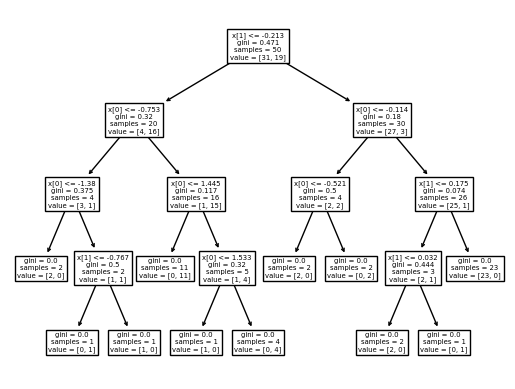

In [18]:
plot_tree(clf1)

[Text(0.5, 0.9545454545454546, 'x[1] <= 1.464\ngini = 0.487\nsamples = 50\nvalue = [21, 29]'),
 Text(0.4230769230769231, 0.8636363636363636, 'x[0] <= 2.521\ngini = 0.458\nsamples = 45\nvalue = [16, 29]'),
 Text(0.34615384615384615, 0.7727272727272727, 'x[0] <= -0.659\ngini = 0.414\nsamples = 41\nvalue = [12, 29]'),
 Text(0.19230769230769232, 0.6818181818181818, 'x[1] <= -2.903\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.11538461538461539, 0.5909090909090909, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.2692307692307692, 0.5909090909090909, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.5, 0.6818181818181818, 'x[1] <= 0.253\ngini = 0.368\nsamples = 37\nvalue = [9, 28]'),
 Text(0.4230769230769231, 0.5909090909090909, 'x[1] <= 0.137\ngini = 0.428\nsamples = 29\nvalue = [9, 20]'),
 Text(0.34615384615384615, 0.5, 'x[1] <= -1.254\ngini = 0.384\nsamples = 27\nvalue = [7, 20]'),
 Text(0.2692307692307692, 0.4090909090909091, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Tex

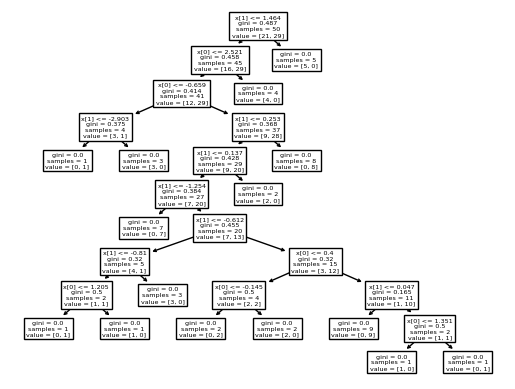

In [19]:
plot_tree(clf2)

[Text(0.5, 0.9285714285714286, 'x[1] <= -0.763\ngini = 0.497\nsamples = 50\nvalue = [23, 27]'),
 Text(0.2727272727272727, 0.7857142857142857, 'x[0] <= -2.476\ngini = 0.165\nsamples = 22\nvalue = [2, 20]'),
 Text(0.18181818181818182, 0.6428571428571429, 'x[0] <= -3.368\ngini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(0.09090909090909091, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.2727272727272727, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.36363636363636365, 0.6428571428571429, 'gini = 0.0\nsamples = 17\nvalue = [0, 17]'),
 Text(0.7272727272727273, 0.7857142857142857, 'x[1] <= 0.939\ngini = 0.375\nsamples = 28\nvalue = [21, 7]'),
 Text(0.6363636363636364, 0.6428571428571429, 'x[1] <= 0.506\ngini = 0.465\nsamples = 19\nvalue = [12, 7]'),
 Text(0.45454545454545453, 0.5, 'x[1] <= -0.227\ngini = 0.391\nsamples = 15\nvalue = [11, 4]'),
 Text(0.36363636363636365, 0.35714285714285715, 'x[0] <= -2.172\ngini = 0.494\nsamples = 9\nvalue = [5, 4]'),
 Text(0.2727272727

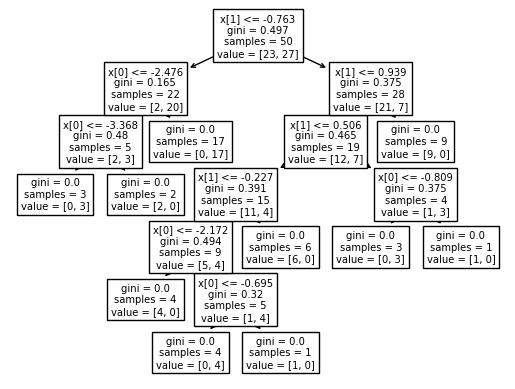

In [20]:
plot_tree(clf3)

In [21]:
clf1.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [22]:
clf2.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [23]:
clf3.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

# random-forest-demo